# Natural Language Processing (NLP) Part 1

**Goals**

- Basics of NLP: tokenization, stopwords, POS tagging, stemming/lematization
- TextBlob library. How to process text with it and do sentiment analysis
- Text classification in sklearn: vectorizing text, modeling with naive bayes, and model optimization with grid search

## What is NLP?

- Using computers to process (analyze, understand, generate) natural human languages
- Most knowledge created by humans is unstructured text, and we need a way to make sense of it
- Build probabilistic model using data about a language
- Also referred to as machine learning with text.

### Examples

- **Information retrieval**: Find relevant results and similar results
    - [Google](https://www.google.com/)
- **Information extraction**: Structured information from unstructured documents
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation**: One language to another
    - [Google Translate](https://translate.google.com/)
- **Text simplification**: Preserve the meaning of text, but simplify the grammar and vocabulary
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Predictive text input**: Faster or easier typing
    - [A friend's application](https://justmarkham.shinyapps.io/textprediction/)
    - [A much better application](https://farsite.shinyapps.io/swiftkey-cap/)
- **Sentiment analysis**: Attitude of speaker
    - [Hater News](http://haternews.herokuapp.com/)
- **Automatic summarization**: Extractive or abstractive summarization
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural Language Generation**: Generate text from data
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation**: Speech-to-text, text-to-speech
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering**: Determine the intent of the question, match query with knowledge base, evaluate hypotheses
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)

### NLP Tools

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"

### NLP is hard! Here's why

- **Ambiguity**:
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: text messages, "y r u" vs "why are you"
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet", "clickbait", "fleek"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"
- **Texts with the same words and phrases can having different meanings **: 
State farm commercial where two different people say "Is this my car? What? This is ridiculous! This can't be happening! Shut up! Ahhhh!!!"


NLP requires an understanding of the **language** and the **world**.

## NLP with the NLTK library

At this point NLTK should be installed and its additional materials should be downloaded as well

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, LancasterStemmer, PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams

from string import punctuation

from textblob import TextBlob

In [11]:
#Downloads the nltk data

# nltk.download()

### Tokenization

- **What:** Separate text into units such as sentences or words
- **Why:** Gives structure to previously unstructured text
- **Notes:** Relatively easy with English language text, not easy with some languages

Sentence tokenization

In [12]:
text = """Hello. How are you, dear Mr. Sir? Are you well?
          Here: drink this! It will make you feel better.
          I mean, it won't make you feel worse!"""


#Tokenize text using sent_tokenize function
sentences = sent_tokenize(text)

sentences



['Hello.',
 'How are you, dear Mr. Sir?',
 'Are you well?',
 'Here: drink this!',
 'It will make you feel better.',
 "I mean, it won't make you feel worse!"]

Based on the output, can you figure out the rules of tokenization?

Word tokenization

In [13]:
#Assign last sentence in sentences to sentence

sentence = sentences[5]

#Word tokenize using one of the sentences from sentences
#Assumes that input has already been tokenized into sentences

words = word_tokenize(sentence)

print(sentence)

print (words)

I mean, it won't make you feel worse!
['I', 'mean', ',', 'it', 'wo', "n't", 'make', 'you', 'feel', 'worse', '!']


In [14]:
print(word_tokenize(text))

['Hello', '.', 'How', 'are', 'you', ',', 'dear', 'Mr.', 'Sir', '?', 'Are', 'you', 'well', '?', 'Here', ':', 'drink', 'this', '!', 'It', 'will', 'make', 'you', 'feel', 'better', '.', 'I', 'mean', ',', 'it', 'wo', "n't", 'make', 'you', 'feel', 'worse', '!']


How did the word_tokenize function work? Let's try the wordpunct_tokenize function

In [15]:
#Pass sentence into wordpunct_tokenize function
wordpunct_tokenize(sentence)

['I', 'mean', ',', 'it', 'won', "'", 't', 'make', 'you', 'feel', 'worse', '!']

Whats the difference?

In [16]:
wordpunct_tokenize('OMG!! How are you?? ..')

['OMG', '!!', 'How', 'are', 'you', '??', '..']

In [17]:
word_tokenize('OMG!! How are you?? ..')

['OMG', '!', '!', 'How', 'are', 'you', '?', '?', '..']

Online demo of various tokenizers: http://text-processing.com/demo/tokenize/

### Part of speech tagging

<br>

"The process of assigning one of the parts of speech to the given word is called Parts Of Speech tagging. It is commonly referred to as POS tagging. Parts of speech include nouns, verbs, adverbs, adjectives, pronouns, conjunction and their sub-categories."

http://language.worldofcomputing.net/pos-tagging/parts-of-speech-tagging.html

In [18]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [19]:
#Text for POS tagging
text = """The process of assigning one of 
the parts of speech to the given word is called Parts Of Speech tagging"""

#Tokenize text
tokens = word_tokenize(text)

# tokens
#Pass tokens into pos_tag function
pos_tag(tokens)

[('The', 'DT'),
 ('process', 'NN'),
 ('of', 'IN'),
 ('assigning', 'VBG'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('parts', 'NNS'),
 ('of', 'IN'),
 ('speech', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('given', 'VBN'),
 ('word', 'NN'),
 ('is', 'VBZ'),
 ('called', 'VBN'),
 ('Parts', 'NNS'),
 ('Of', 'IN'),
 ('Speech', 'NNP'),
 ('tagging', 'VBG')]

Output is tuple pairings of tokens with their POS tags

#### Some of POS tags: 
WP: wh-pronoun ("who", "what")  
VBZ: verb, 3rd person sing. present ("takes")  
VBG: verb, gerund/present participle ("taking")  
TO: to ("to go", "to him")   
DT: determiner ("the", "this")  
NN: noun, singular or mass ("door")  

All tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

### Stopwords

Common words that will likely appear in any text. Anything that can appears in a poem, rap lyric, or medical research paper is most likely a stopword. In most NLP contexts, we remove the stopwords because they don't tell you much about your text, they have no value.

In [20]:

#Intialize the list of stopwords 

sw = stopwords.words('english')

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [21]:
#View list of punctuation characters

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#Add them to the sw list

sw += punctuation

In [23]:
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Let's remove stopwords and punctuation from a corpus

In [24]:

corpus = """Sony Michel's touchdown in double-overtime gave 
Georgia a 54-48 Rose Bowl win over Oklahoma and 
made up for a late fumble that resulted in six points for the Sooners."""

In [25]:
#Tokenize text

tokens = wordpunct_tokenize(corpus)

print(tokens)

['Sony', 'Michel', "'", 's', 'touchdown', 'in', 'double', '-', 'overtime', 'gave', 'Georgia', 'a', '54', '-', '48', 'Rose', 'Bowl', 'win', 'over', 'Oklahoma', 'and', 'made', 'up', 'for', 'a', 'late', 'fumble', 'that', 'resulted', 'in', 'six', 'points', 'for', 'the', 'Sooners', '.']


In [26]:
len(tokens)

36

In [27]:
type(tokens)

list

In [28]:
type(sw)

list

In [29]:
#Clean up tokens by removing stopwords and punctuation characters

clean_tokens = [x for x in tokens if x not in sw]

clean_tokens

['Sony',
 'Michel',
 'touchdown',
 'double',
 'overtime',
 'gave',
 'Georgia',
 '54',
 '48',
 'Rose',
 'Bowl',
 'win',
 'Oklahoma',
 'made',
 'late',
 'fumble',
 'resulted',
 'six',
 'points',
 'Sooners']

In [30]:
len(clean_tokens)

20

### Stemming and lemmatization

<br>

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [31]:
#Intialize stemmer object

stemmer = SnowballStemmer('english')

In [32]:
#Derive stems from random words

stemmer.stem('running')

'run'

In [33]:
stemmer.stem('absolutely')

'absolut'

In [34]:
stemmer.stem('madness')

'mad'

In [35]:
stemmer.stem('forgave')

'forgav'

In [36]:
stemmer.stem('ran')

'ran'

In [37]:
stemmer.stem('rain')

'rain'

In [38]:
stemmer.stem('rained')

'rain'

In [39]:
stemmer.stem('student')

'student'

In [40]:
stemmer.stem('course')

'cours'

In [41]:
stemmer.stem('Roma')

'roma'

In [42]:
# stemmer = SnowballStemmer('hindi')

In [69]:
stemmer.stem('gave')

'gave'

In [70]:
stemmer.stem('give')

'give'

In [43]:
#Derive the stems of every token in clean tokens

stems = [stemmer.stem(token) for token in clean_tokens]

print(clean_tokens)
print(stems)

['Sony', 'Michel', 'touchdown', 'double', 'overtime', 'gave', 'Georgia', '54', '48', 'Rose', 'Bowl', 'win', 'Oklahoma', 'made', 'late', 'fumble', 'resulted', 'six', 'points', 'Sooners']
['soni', 'michel', 'touchdown', 'doubl', 'overtim', 'gave', 'georgia', '54', '48', 'rose', 'bowl', 'win', 'oklahoma', 'made', 'late', 'fumbl', 'result', 'six', 'point', 'sooner']


What do you notice about the results of the stemming process?

In [57]:
mytext = "Omg, Natural Language Processing is so cool and I'm really loving this workshop!"

In [58]:
mytokens = word_tokenize(mytext)
mytokens

['Omg',
 ',',
 'Natural',
 'Language',
 'Processing',
 'is',
 'so',
 'cool',
 'and',
 'I',
 "'m",
 'really',
 'loving',
 'this',
 'workshop',
 '!']

In [59]:
lop = [LancasterStemmer().stem(mytoken) for mytoken in mytokens]
print(lop)

['omg', ',', 'nat', 'langu', 'process', 'is', 'so', 'cool', 'and', 'i', "'m", 'real', 'lov', 'thi', 'workshop', '!']


In [60]:
pop = [PorterStemmer().stem(mytoken) for mytoken in mytokens]
print(pop)

['omg', ',', 'natur', 'languag', 'process', 'is', 'so', 'cool', 'and', 'I', "'m", 'realli', 'love', 'thi', 'workshop', '!']


In [61]:
sop = [SnowballStemmer('english').stem(mytoken) for mytoken in mytokens]
print(sop)

['omg', ',', 'natur', 'languag', 'process', 'is', 'so', 'cool', 'and', 'i', "'m", 'realli', 'love', 'this', 'workshop', '!']


**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

Compare and contrast the stems and lemmatization of certain words

In [62]:
#Stem of octopi (plural of octopus)
stemmer.stem('octopi')

'octopi'

In [63]:
#Intialize lemmatization object

lem = WordNetLemmatizer()

#Lemmatize octopi

lem.lemmatize('octopi')

'octopus'

What's the difference? Try it again with indices

In [64]:
#Stem

stemmer.stem('indices')

'indic'

In [65]:
#Lemon
lem.lemmatize('indices')

'index'

Derive the lemons of clean_tokens

In [68]:
#Lemmative the clean tokens and set pos = v

lemons = [lem.lemmatize(token) for token in clean_tokens ]

print(lemons)

['Sony', 'Michel', 'touchdown', 'double', 'overtime', 'gave', 'Georgia', '54', '48', 'Rose', 'Bowl', 'win', 'Oklahoma', 'made', 'late', 'fumble', 'resulted', 'six', 'point', 'Sooners']


### N-Grams

Collections of adjacent words, number of words in each collection is determined by N. 

Bigrams = Two-word phrases

Trigrams = Three-word phrases

http://text-analytics101.rxnlp.com/2014/11/what-are-n-grams.html

In [75]:

#Set N to 2 for bigrams
N = 2

#Make bigrams from clean_tokens
bigrams = ngrams(clean_tokens, 2)

list(bigrams)


[('Sony', 'Michel'),
 ('Michel', 'touchdown'),
 ('touchdown', 'double'),
 ('double', 'overtime'),
 ('overtime', 'gave'),
 ('gave', 'Georgia'),
 ('Georgia', '54'),
 ('54', '48'),
 ('48', 'Rose'),
 ('Rose', 'Bowl'),
 ('Bowl', 'win'),
 ('win', 'Oklahoma'),
 ('Oklahoma', 'made'),
 ('made', 'late'),
 ('late', 'fumble'),
 ('fumble', 'resulted'),
 ('resulted', 'six'),
 ('six', 'points'),
 ('points', 'Sooners')]

In [78]:

#Set N to 3 for trigrams
N = 3

#Make bigrams from clean_tokens
trigrams = ngrams(clean_tokens,3)

list(trigrams)


[('Sony', 'Michel', 'touchdown'),
 ('Michel', 'touchdown', 'double'),
 ('touchdown', 'double', 'overtime'),
 ('double', 'overtime', 'gave'),
 ('overtime', 'gave', 'Georgia'),
 ('gave', 'Georgia', '54'),
 ('Georgia', '54', '48'),
 ('54', '48', 'Rose'),
 ('48', 'Rose', 'Bowl'),
 ('Rose', 'Bowl', 'win'),
 ('Bowl', 'win', 'Oklahoma'),
 ('win', 'Oklahoma', 'made'),
 ('Oklahoma', 'made', 'late'),
 ('made', 'late', 'fumble'),
 ('late', 'fumble', 'resulted'),
 ('fumble', 'resulted', 'six'),
 ('resulted', 'six', 'points'),
 ('six', 'points', 'Sooners')]

## TextBlob

<br>

Python library for processing simple NLP tasks.


You may need to download the corpora in textblob. Type into command line:

python -m textblob.download_corpora

In [79]:
#Text for using TextBlob

corpus = """
Mr. Persson, 35, sits in front of four computer screens,
one displaying the loader he steers as it lifts freshly blasted rock containing silver,
zinc and lead. If he were down in the mine shaft operating the loader manually,
he would be inhaling dust and exhaust fumes. 
Instead, he reclines in an office chair while using a joystick to control the machine.
"""

#Pass in text into textblob
blob = TextBlob(corpus)

Explore the capabilities of textblob

In [80]:
#tokenized words

blob.words

WordList(['Mr', 'Persson', '35', 'sits', 'in', 'front', 'of', 'four', 'computer', 'screens', 'one', 'displaying', 'the', 'loader', 'he', 'steers', 'as', 'it', 'lifts', 'freshly', 'blasted', 'rock', 'containing', 'silver', 'zinc', 'and', 'lead', 'If', 'he', 'were', 'down', 'in', 'the', 'mine', 'shaft', 'operating', 'the', 'loader', 'manually', 'he', 'would', 'be', 'inhaling', 'dust', 'and', 'exhaust', 'fumes', 'Instead', 'he', 'reclines', 'in', 'an', 'office', 'chair', 'while', 'using', 'a', 'joystick', 'to', 'control', 'the', 'machine'])

In [81]:
#Sentences
blob.sentences

[Sentence("
 Mr. Persson, 35, sits in front of four computer screens,
 one displaying the loader he steers as it lifts freshly blasted rock containing silver,
 zinc and lead."),
 Sentence("If he were down in the mine shaft operating the loader manually,
 he would be inhaling dust and exhaust fumes."),
 Sentence("Instead, he reclines in an office chair while using a joystick to control the machine.")]

In [88]:
b = TextBlob('a.b.c.d.e.f hddkj. sjhdjhd. aaa. aaaaaab. sc. d. e. ff. gg.')
b.sentences

[Sentence("a.b.c.d.e.f hddkj."),
 Sentence("sjhdjhd."),
 Sentence("aaa."),
 Sentence("aaaaaab."),
 Sentence("sc."),
 Sentence("d. e. ff."),
 Sentence("gg.")]

In [89]:
#Word counts

blob.word_counts

defaultdict(int,
            {'35': 1,
             'a': 1,
             'an': 1,
             'and': 2,
             'as': 1,
             'be': 1,
             'blasted': 1,
             'chair': 1,
             'computer': 1,
             'containing': 1,
             'control': 1,
             'displaying': 1,
             'down': 1,
             'dust': 1,
             'exhaust': 1,
             'four': 1,
             'freshly': 1,
             'front': 1,
             'fumes': 1,
             'he': 4,
             'if': 1,
             'in': 3,
             'inhaling': 1,
             'instead': 1,
             'it': 1,
             'joystick': 1,
             'lead': 1,
             'lifts': 1,
             'loader': 2,
             'machine': 1,
             'manually': 1,
             'mine': 1,
             'mr': 1,
             'of': 1,
             'office': 1,
             'one': 1,
             'operating': 1,
             'persson': 1,
             'reclines': 1,
      

In [90]:
#Pos tags

blob.pos_tags

[('Mr.', 'NNP'),
 ('Persson', 'NNP'),
 ('35', 'CD'),
 ('sits', 'NNS'),
 ('in', 'IN'),
 ('front', 'NN'),
 ('of', 'IN'),
 ('four', 'CD'),
 ('computer', 'NN'),
 ('screens', 'NNS'),
 ('one', 'CD'),
 ('displaying', 'VBG'),
 ('the', 'DT'),
 ('loader', 'NN'),
 ('he', 'PRP'),
 ('steers', 'VBZ'),
 ('as', 'IN'),
 ('it', 'PRP'),
 ('lifts', 'VBZ'),
 ('freshly', 'RB'),
 ('blasted', 'VBN'),
 ('rock', 'NN'),
 ('containing', 'VBG'),
 ('silver', 'NN'),
 ('zinc', 'NN'),
 ('and', 'CC'),
 ('lead', 'NN'),
 ('If', 'IN'),
 ('he', 'PRP'),
 ('were', 'VBD'),
 ('down', 'RB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mine', 'NN'),
 ('shaft', 'NN'),
 ('operating', 'VBG'),
 ('the', 'DT'),
 ('loader', 'NN'),
 ('manually', 'RB'),
 ('he', 'PRP'),
 ('would', 'MD'),
 ('be', 'VB'),
 ('inhaling', 'VBG'),
 ('dust', 'JJ'),
 ('and', 'CC'),
 ('exhaust', 'JJ'),
 ('fumes', 'NNS'),
 ('Instead', 'RB'),
 ('he', 'PRP'),
 ('reclines', 'VBZ'),
 ('in', 'IN'),
 ('an', 'DT'),
 ('office', 'NN'),
 ('chair', 'NN'),
 ('while', 'IN'),
 ('using', 'V

In [91]:
#Noun phrases

blob.noun_phrases

WordList(['mr. persson', 'computer screens', 'mine shaft', 'exhaust fumes', 'office chair'])

In [ ]:
#Singularize words
blob.words.singularize()

In [92]:
#Pluralize words
blob.words.pluralize()

WordList(['Mrs', 'Perssons', '35s', 'sitss', 'ins', 'fronts', 'ofs', 'fours', 'computers', 'screenss', 'ones', 'displayings', 'thes', 'loaders', 'they', 'steerss', 'ass', 'they', 'liftss', 'freshlies', 'blasteds', 'rocks', 'containings', 'silvers', 'zincs', 'ands', 'leads', 'Ifs', 'they', 'weres', 'downs', 'ins', 'thes', 'ours', 'shafts', 'operatings', 'thes', 'loaders', 'manuallies', 'they', 'woulds', 'bes', 'inhalings', 'dusts', 'ands', 'exhausts', 'fumess', 'Insteads', 'they', 'recliness', 'ins', 'some', 'offices', 'chairs', 'whiles', 'usings', 'some', 'joysticks', 'toes', 'controls', 'thes', 'machines'])

In [103]:
#Lemmatization
blob.words.lemmatize()

WordList(['Mr', 'Persson', '35', 'sits', 'in', 'front', 'of', 'four', 'computer', 'screen', 'one', 'displaying', 'the', 'loader', 'he', 'steer', 'a', 'it', 'lift', 'freshly', 'blasted', 'rock', 'containing', 'silver', 'zinc', 'and', 'lead', 'If', 'he', 'were', 'down', 'in', 'the', 'mine', 'shaft', 'operating', 'the', 'loader', 'manually', 'he', 'would', 'be', 'inhaling', 'dust', 'and', 'exhaust', 'fume', 'Instead', 'he', 'reclines', 'in', 'an', 'office', 'chair', 'while', 'using', 'a', 'joystick', 'to', 'control', 'the', 'machine'])

In [101]:
#or
# print([word.lemmatize for word in blob.words])
print([word.lemmatize() for word in blob.words])

['Mr', 'Persson', '35', 'sits', 'in', 'front', 'of', 'four', 'computer', 'screen', 'one', 'displaying', 'the', 'loader', 'he', 'steer', 'a', 'it', 'lift', 'freshly', 'blasted', 'rock', 'containing', 'silver', 'zinc', 'and', 'lead', 'If', 'he', 'were', 'down', 'in', 'the', 'mine', 'shaft', 'operating', 'the', 'loader', 'manually', 'he', 'would', 'be', 'inhaling', 'dust', 'and', 'exhaust', 'fume', 'Instead', 'he', 'reclines', 'in', 'an', 'office', 'chair', 'while', 'using', 'a', 'joystick', 'to', 'control', 'the', 'machine']


In [105]:
#Lemmatization with verbs
print([word.lemmatize(pos='v') for word in blob.words])

['Mr', 'Persson', '35', 'sit', 'in', 'front', 'of', 'four', 'computer', 'screen', 'one', 'display', 'the', 'loader', 'he', 'steer', 'as', 'it', 'lift', 'freshly', 'blast', 'rock', 'contain', 'silver', 'zinc', 'and', 'lead', 'If', 'he', 'be', 'down', 'in', 'the', 'mine', 'shaft', 'operate', 'the', 'loader', 'manually', 'he', 'would', 'be', 'inhale', 'dust', 'and', 'exhaust', 'fume', 'Instead', 'he', 'recline', 'in', 'an', 'office', 'chair', 'while', 'use', 'a', 'joystick', 'to', 'control', 'the', 'machine']


In [106]:
#bigrams
blob.ngrams(n=2)

[WordList(['Mr', 'Persson']),
 WordList(['Persson', '35']),
 WordList(['35', 'sits']),
 WordList(['sits', 'in']),
 WordList(['in', 'front']),
 WordList(['front', 'of']),
 WordList(['of', 'four']),
 WordList(['four', 'computer']),
 WordList(['computer', 'screens']),
 WordList(['screens', 'one']),
 WordList(['one', 'displaying']),
 WordList(['displaying', 'the']),
 WordList(['the', 'loader']),
 WordList(['loader', 'he']),
 WordList(['he', 'steers']),
 WordList(['steers', 'as']),
 WordList(['as', 'it']),
 WordList(['it', 'lifts']),
 WordList(['lifts', 'freshly']),
 WordList(['freshly', 'blasted']),
 WordList(['blasted', 'rock']),
 WordList(['rock', 'containing']),
 WordList(['containing', 'silver']),
 WordList(['silver', 'zinc']),
 WordList(['zinc', 'and']),
 WordList(['and', 'lead']),
 WordList(['lead', 'If']),
 WordList(['If', 'he']),
 WordList(['he', 'were']),
 WordList(['were', 'down']),
 WordList(['down', 'in']),
 WordList(['in', 'the']),
 WordList(['the', 'mine']),
 WordList(['mine'

### Sentiment Analysis

TextBlob uses an algorithm to rate text on subjectivity and polarity. Subjectivity measures how opinonated a text is on a scale from 0.0-1.0 and polarity measures how happy or mad or a text is on a scale from -1.0-1.0. 

In [107]:
#Text for sentiment analysis
raw_text = "I love learning about data science, it is very fun."

#Pass in raw_text into textblob
blob = TextBlob(raw_text)

#Derive scores
blob.sentiment


Sentiment(polarity=0.445, subjectivity=0.43)

In [108]:
#Polarity score
blob.sentiment.polarity

0.445

In [109]:
#Subjectivity score
blob.sentiment.subjectivity

0.43

More examples

In [112]:
TextBlob("it's so awesome").sentiment


Sentiment(polarity=1.0, subjectivity=1.0)

In [113]:
TextBlob("I love this course.").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [114]:
TextBlob("Oh my god I love this course.").sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [115]:
TextBlob("it's so awesome.").sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [116]:
TextBlob("I hate cupcakes.").sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [117]:
TextBlob("i have no opinions about the matter").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

Let's analyze the sentiment of yelp reviews

In [128]:
#Load in yelp review data

path = "../../data/NLP_data/yelp.csv"

yelp = pd.read_csv(path, encoding='unicode-escape')

yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [129]:
#Read first review

review = yelp.text[0]
review

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [130]:
#Textblob review and get its sentiments scores

blob = TextBlob(review)
blob.sentiment

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)

What do you think of the scores? Are they too high or low?

In [132]:
#Calculate polarity and subjectivity scores for entire corpus
# by applying polarity and sentiment over yelp reviews df

yelp["polarity"] = yelp.text.apply(lambda x: TextBlob(x).sentiment.polarity)
yelp["subjectivity"] = yelp.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)

What are the most negative and positives reviews

In [134]:
#Adjust settings
# pd.set_option('max_colwidth', 500)

In [138]:
#Most negative

yelp[yelp.polarity==-1].text.head()

773     This was absolutely horrible. I got the supreme pizza with the mystery meats.  I threw it in the trash. I will wait until I get to my destination to eat. Horrible!!!
1517                                                                                                                                      Nasty workers and over priced trash
3266                                                                                                         Absolutely awful... these guys have NO idea what they are doing!
4766                                                                                                                                                           Very bad food!
5812                                                                                                                            I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [139]:
#Most positive

yelp[yelp.polarity==1].text.head()


254                                                                                                                                                                             Our server Gary was awesome. Food was amazing...an experience.
347                                                                                                                                                           3 syllables for this place. \r\nA-MAZ-ING!\r\n\r\nThe best Phoenix has to offer.
420                                                                                                                                                                                                                          LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as Chino is the one thing we miss. Every time I think about Chino Bandido my mouth starts watering. If I am ever in the state again I will drive out of my way just to go to it again. YUMMY!
679                                         

Are there reviews with 5 stars but low polarity scores?

In [146]:
# yelp[(yelp.polarity==-1) & (yelp.stars==5)].text.head()

yelp[(yelp.polarity<=-0.6) & (yelp.stars==5)].text.head()

# yelp[(yelp.polarity==-1) & (yelp.stars==5)].head()

1287    Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.
6726                                                   Brown bag chicken sammich, mac n cheese, fried okra, and the bourbon drink.  Nuff said.
Name: text, dtype: object

In [148]:
#One star reviews with high polarity scores

yelp[(yelp.polarity==1) & (yelp.stars==1)].text.head()

8833    The owner has changed hands & this place isn't what it used to be.  If you want up to date paper & quality product...go to Scrap Happy OR Crop Girls!
Name: text, dtype: object

Plot the scores

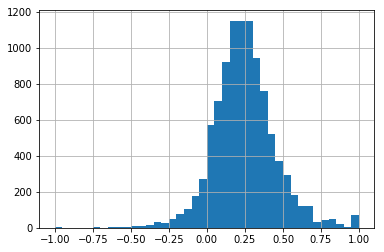

In [150]:
#Histogram of polarity scores

yelp.polarity.hist(bins=40)

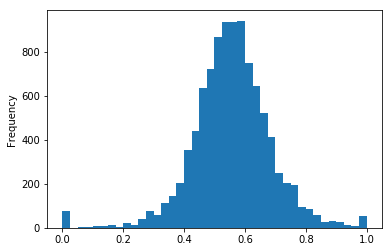

In [151]:
#Histogram of subjectivity scores
yelp.subjectivity.plot(kind='hist', bins=40)

In [ ]:
#Plot scatter plot of polarity vs subjectivity scores

plt.xlabel("Polarity Scores")
plt.ylabel("Subjectivity Scores")

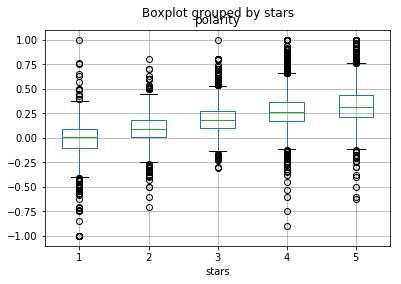

In [155]:
#Plot boxplots of the polarity by yelp stars
# yelp.polarity.plot.box(by='stars');
yelp.boxplot(column='polarity',by='stars');

What are you thoughts on the plots? Do they make sense to you?

## Text Classification

We're going to train a machine learning algorithm to classify yelp reviews as either five or one stars. But first we need to transform or "vectorize" our raw text before make any classifications.

### Count Vectorizer: How to turn text into numbers

In [158]:
# Create a new DataFrame called yelp_best_worst that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [160]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

#Null accuracy
print(y.value_counts())
print(y.value_counts(normalize=True))

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

5    3337
1     749
Name: stars, dtype: int64
5    0.816691
1    0.183309
Name: stars, dtype: float64


We can't pass in raw text into an algorithm, first we have to vectorize it, which means converting a collection of text documents to a matrix of token counts.

<br>

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [161]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [181]:
# Term Frequency

vect = CountVectorizer()
dtm = vect.fit_transform(simple_train)

# print(vect.get_params())
print(vect.get_feature_names())
print(dtm.toarray())

tf = pd.DataFrame(data=dtm.toarray(), columns=vect.get_feature_names())
tf

['cab', 'call', 'me', 'please', 'tonight', 'you']
[[0 1 0 0 1 1]
 [1 1 1 0 0 0]
 [0 1 1 2 0 0]]


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [183]:
# transforming a new sentence
new_sentence = ['please call yourself a taxi']

# vect = CountVectorizer()
print(pd.DataFrame(data=vect.transform(new_sentence).toarray(), columns=vect.get_feature_names()))
print(pd.DataFrame(data=vect.fit_transform(new_sentence).toarray(), columns=vect.get_feature_names()))


   cab  call  me  please  tonight  you
0    0     1   0       1        0    0
   call  please  taxi  yourself
0     1       1     1         1


What do you notice? How come the two dataframes have the same features?

Use CountVectorizer to create document-term matrices from X_train and X_test

In [189]:
#Intialize vectorizer object
vect = CountVectorizer()

#Fit and transform with training data
X_train_dtm = vect.fit_transform(X_train)

#Transform the testing data
X_test_dtm = vect.transform(X_test)

In [190]:
#Vectorized data shapes

print(X_train_dtm.shape)
print(X_test_dtm.shape)


(3064, 16825)
(1022, 16825)


In [193]:
# first 50 features
# X_train_dtm.toarray()[:50]

print(vect.get_feature_names()[:50])

['00', '000', '00a', '00am', '00pm', '01', '02', '03', '03342', '04', '05', '06', '07', '09', '0buxoc0crqjpvkezo3bqog', '0l', '10', '100', '1000', '1000x', '1001', '100th', '101', '102', '105', '1070', '108', '10am', '10ish', '10min', '10mins', '10minutes', '10pm', '10th', '10x', '11', '110', '1100', '111', '111th', '112', '115th', '118', '11a', '11am', '11p', '11pm', '12', '120', '128i']


In [197]:
# print(vect.max_features)

In [201]:
# Random selection of 50 features
print(vect.get_feature_names()[13000:13050])

['scollops', 'scone', 'scones', 'scoop', 'scooped', 'scoops', 'scooter', 'scope', 'scorching', 'score', 'scored', 'scorpion', 'scorpions', 'scotch', 'scothes', 'scott', 'scottsadale', 'scottsdale', 'scottsdaley', 'scottsdalian', 'scottsdalish', 'scout', 'scow', 'scowl', 'scraggly', 'scramble', 'scrambled', 'scrambler', 'scramblers', 'scrambles', 'scrambling', 'scraped', 'scraping', 'scraps', 'scrapy', 'scratch', 'scratched', 'scratcher', 'scream', 'screamed', 'screaming', 'screams', 'screen', 'screening', 'screens', 'screw', 'screwed', 'screwing', 'screws', 'scrounge']


Let's put it in a dataframe

In [202]:
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

,00,000,00a,00am,00pm,01,02,03,03342,04,...,zucchini,zuchinni,zumba,zupa,zuzu,zwiebel,zzed,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ways to configure vectorizer

In [203]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- **lowercase:** boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [204]:
#Create a count vectorizer that doesn't lowercase the words
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape # has more features

(3064, 20838)

- **ngram_range:** tuple (min_n, max_n)
- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [205]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(2,3))
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 439573)

In [206]:
# last 50 features
print(vect.get_feature_names()[:50])

['00 25', '00 25 00', '00 am', '00 am like', '00 am on', '00 am they', '00 amazing', '00 amazing appetizer', '00 and', '00 and dinner', '00 and that', '00 and the', '00 and they', '00 at', '00 at 30', '00 before', '00 before tip', '00 bill', '00 bill they', '00 can', '00 can wait', '00 charge', '00 charge but', '00 cover', '00 cover charge', '00 credit', '00 credit for', '00 did', '00 did not', '00 did say', '00 each', '00 each they', '00 entree', '00 entree everything', '00 etc', '00 etc was', '00 everyday', '00 everyday except', '00 extra', '00 extra of', '00 food', '00 food drinks', '00 for', '00 for 24', '00 for 50', '00 for all', '00 for glass', '00 for lb', '00 for mediocre', '00 for show']


- **stop_words:** string {'english'}, list, or None (default)
- If 'english', a built-in stop word list for English is used.
- If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. This allows you use to use your own custom stopwords list. Great for corpus-specific stopwords, that words that aren't regular stopwords but become stopwords depending on the context.
- If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [207]:
#Set vectorizer with stop_words to english
vect = CountVectorizer(stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 16528)

In [212]:
#Show the stopwords used
print(vect.get_stop_words())


frozenset({'therein', 'without', 'cant', 'also', 'yours', 'than', 'forty', 'there', 'something', 'seeming', 'everyone', 'another', 'these', 'find', 'wherever', 'hasnt', 'what', 'your', 'all', 'those', 'sincere', 'at', 'full', 'go', 'six', 'detail', 'will', 'before', 'meanwhile', 'again', 'never', 'own', 'became', 'she', 'nine', 'thick', 'third', 'as', 'already', 'get', 'keep', 'into', 'sixty', 'enough', 'noone', 'still', 'among', 'rather', 're', 'such', 'me', 'while', 'formerly', 'you', 'should', 'somewhere', 'empty', 'him', 'cry', 'nevertheless', 'then', 'beside', 'he', 'though', 'however', 'top', 'fill', 'whither', 'that', 'yet', 'often', 'might', 'found', 'amongst', 'was', 'afterwards', 'were', 'its', 'throughout', 'now', 'un', 'anywhere', 'mostly', 'anything', 'couldnt', 'always', 'ten', 'amount', 'behind', 'de', 'himself', 'this', 'when', 'after', 'whom', 'with', 'wherein', 'alone', 'in', 'anyway', 'across', 'myself', 'further', 'along', 'for', 'hereby', 'anyone', 'how', 'mine', '

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

- **min_df:** float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts.

In [213]:
#Set vectorizer with max_features to 2000
vect = CountVectorizer(max_features=2000)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 2000)

In [233]:
#Set vectorizer with min_df to 5
vect = CountVectorizer(min_df=5)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 4340)

In [265]:
vect = CountVectorizer(min_df=1000, stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 3)

In [266]:
print(vect.get_feature_names())


['food', 'great', 'place']


In [267]:
X_train_dtm.toarray().sum(axis=0)

array([1661, 1570, 1870], dtype=int64)

In [243]:
# vect.max_features

In [244]:
#Set vectorizer with min_df to 0.1
vect = CountVectorizer(min_df=0.1)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 128)

In [246]:
#What are the words that show up in at least 10 percent of documents

print(vect.get_feature_names())

['about', 'after', 'all', 'also', 'always', 'am', 'amazing', 'an', 'and', 'any', 'are', 'as', 'at', 'back', 'be', 'because', 'been', 'best', 'better', 'but', 'by', 'can', 'could', 'delicious', 'did', 'do', 'don', 'eat', 'even', 'ever', 'every', 'everything', 'experience', 'few', 'first', 'food', 'for', 'fresh', 'friendly', 'from', 'get', 'go', 'going', 'good', 'got', 'great', 'had', 'has', 'have', 'he', 'here', 'how', 'if', 'in', 'is', 'it', 'just', 'know', 'like', 'little', 'love', 'made', 'make', 'me', 'menu', 'more', 'much', 'my', 'never', 'nice', 'no', 'not', 'now', 'of', 'off', 'on', 'one', 'only', 'or', 'order', 'ordered', 'other', 'our', 'out', 'over', 'people', 'place', 'really', 'restaurant', 'right', 'say', 'service', 'so', 'some', 'staff', 'take', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'they', 'this', 'time', 'to', 'too', 'try', 'up', 'us', 've', 'very', 'was', 'way', 'we', 'well', 'went', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'yo

### Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents). Court, ball, shooting, passing will show up frequently in a basketball corpus, but essentially add no meaning. Corpus-specific stopwords.

[Source: Ultra Violet Analytics](http://www.ultravioletanalytics.com/2016/11/18/tf-idf-basics-with-pandas-scikit-learn/)

"Tf-idf is a very common technique for determining roughly what each document in a set of documents is “about”. It cleverly accomplishes this by looking at two simple metrics: tf (term frequency) and idf (inverse document frequency). Term frequency is the proportion of occurrences of a specific term to total number of terms in a document. Inverse document frequency is the inverse of the proportion of documents that contain that word/phrase. The general idea is that if a specific phrase appears a lot of times in a given document, but it doesn’t appear in many other documents, then we have a good idea that the phrase is important in distinguishing that document from all the others."

In [252]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [254]:
# Term Frequency with CountVectorizer

# vect = CountVectorizer(stop_words='english')
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [255]:
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

Binary = True assigns a 1 if a word is present irregardless of count, and 0 for absent words.

In [276]:
#Intialize vectorizer with binary = true
vect = CountVectorizer(binary=True)

#Fit and transform the text and sum up the counts
df= vect.fit_transform(simple_train).toarray().sum(axis=0)

print(df)

print(df.reshape(1,6))

#Put results into dataframe
pd.DataFrame(df.reshape(1,6), columns=vect.get_feature_names())

[1 3 2 1 1 1]
[[1 3 2 1 1 1]]


,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


This is how many documents each word appears in.

TFIDF (simple version)

In [ ]:
# Divide tf by df


In [277]:
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


Let's check out the sklearn version

In [278]:
#Intialize vectorizer
vect = TfidfVectorizer()

#Fit and transform using tfidf and input results into dataframe
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


### Naive Bayes

Bayes Theorem covers the probabilistic relationship between multiple variables, and specifically allows us to define one conditional in terms of the underlying probabilities and the inverse condition. Specifically, it can be defined as:

$$P(y|x) = P(y)P(x|y)/P(x)$$

This means the probability of y given x condition equals the probability of y times the probability of x given y condition divided by the probability of x.

This theorem can be extended to when x is a vector (containing the multiple x variables used as inputs for the model) to:

$$P(y|x_1,...,x_n) = P(y)P(x_1,...,x_n|y)/P(x_1,...,x_n)$$

Let's pretend we have an email with three words: "Send money now." We'll use Naive Bayes to classify it as **ham or spam.**

$$P(spam \ | \ \text{send money now}) = \frac {P(\text{send money now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

By assuming that the features (the words) are **conditionally independent**, we can simplify the likelihood function:

$$P(spam \ | \ \text{send money now}) \approx \frac {P(\text{send} \ | \ spam) \times P(\text{money} \ | \ spam) \times P(\text{now} \ | \ spam) \times P(spam)} {P(\text{send money now})}$$

We can calculate all of the values in the numerator by examining a corpus of **spam email**:

$$P(spam \ | \ \text{send money now}) \approx \frac {0.2 \times 0.1 \times 0.1 \times 0.9} {P(\text{send money now})} = \frac {0.0018} {P(\text{send money now})}$$

We would repeat this process with a corpus of **ham email**:

$$P(ham \ | \ \text{send money now}) \approx \frac {0.05 \times 0.01 \times 0.1 \times 0.1} {P(\text{send money now})} = \frac {0.000005} {P(\text{send money now})}$$

All we care about is whether spam or ham has the **higher probability**, and so we predict that the email is **spam**.

**Key takeaways**

- The **"naive" assumption** of Naive Bayes (that the features are conditionally independent) is critical to making these calculations simple.
- The **normalization constant** (the denominator) can be ignored since it's the same for all classes.
- The **prior probability** is much less relevant once you have a lot of features.

<b>Pros</b>: 
- Very fast. Adept at handling tens of thousands of features which is why it's used for text classification
- Works well with a small number of observations
- Isn't negatively affected by "noise"

<b>Cons</b>:
- Useless for probabilities. Most of the time assigns probabilites that are close to zero or one
- It is literally "naive". Meaning it assumes features are independent.

Let's make our first model

In [279]:
#Vectorize the whole corpus. Remove stop words.

#Intialize vectorizer
vect = CountVectorizer(stop_words='english')

#fit and transform data
X_dtm = vect.fit_transform(X)

In [283]:
#Intialize model
nb = MultinomialNB()


#Fit and score model
nb.fit(X_dtm, y)

nb.score(X_dtm, y)

0.9747919725893294

Not bad, but let's try it on a train-test split

In [285]:
#Null accuracy of testing set

y.value_counts()

y.value_counts(normalize=True)

5    0.816691
1    0.183309
Name: stars, dtype: float64

In [288]:
#Intialize vectorizer 
vect = CountVectorizer(stop_words='english')

#Fit and transform on the training data
X_train_dtm = vect.fit_transform(X_train)
#Transform the testing data witht the vectorizer
X_test_dtm = vect.transform(X_test)

#Intialize model
nb = MultinomialNB()
#Fit it on training data
nb.fit(X_train_dtm, y_train)

#Score it on training and testing data
print(nb.score(X_train_dtm, y_train))
print(nb.score(X_test_dtm, y_test))


0.9758485639686684
0.9158512720156555


How do you assess this model? 

<br>

Let's try it on some new text

In [292]:
# Predict on new text
new_text = ["I had a decent time at this restaurant. \
The food was delicious but the service was very poor. \
I recommend the salad but do not eat the french fries."]
new_text_transform = vect.transform(new_text)

#Predict class
print(nb.predict(new_text_transform))

#Class probabilities
print(nb.predict_proba(new_text_transform))

[5]
[[0.03322787 0.96677213]]


Let's do this again with the tfidf vectorizer

In [294]:
#Intialize vectorizer 
vect = TfidfVectorizer(stop_words='english')

#Fit and transform on the training data
X_train_dtm = vect.fit_transform(X_train)

#Transform the testing data witht the vectorizer
X_test_dtm = vect.transform(X_test)

#Intialize model
nb = MultinomialNB()
#Fit it on training data
nb.fit(X_train_dtm, y_train)

#Score it on training and testing data
print(nb.score(X_train_dtm, y_train))
print(nb.score(X_test_dtm, y_test))


0.8204960835509139
0.8199608610567515


Thoughts on the results? Did you expect the scores to be lower than the Countvectorizer ones?

Let's cross validate with pipelines

In [299]:
#Create pipeline with tfidf vectorizer with max_features = 1000 and lowercase = true

# pipe = make_pipeline(TfidfVectorizer(max_features=1000, lowercase=False), MultinomialNB())

pipe = make_pipeline(TfidfVectorizer(), MultinomialNB())

# pipe

#Cross validate with the pipeline and use the full raw text
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8171812425011602

Grid search time. We could spend a whole bunch of time testing various combinations of parameters, so instead of doing that, let's use grid search

In [326]:
#Make pipeline for countvectorizer and naive bayes model
pipe_cv = make_pipeline(CountVectorizer(), MultinomialNB())

#Intialize parameters for count vectorizer
param_grid_cv = {}
param_grid_cv['countvectorizer__max_features']=[1000, 2500, 5000, 7500, 1000]
param_grid_cv['countvectorizer__lowercase'] = [True, False]
param_grid_cv['countvectorizer__ngram_range']=[(1,1),(2,2), (1,2)]

In [336]:
#Make pipeline for tfidfvectorizer and naive bayes model
pipe_tf = make_pipeline(TfidfVectorizer(), MultinomialNB())

#Intialize parameters for tfidf vectorizer
param_grid_tf = {}
param_grid_tf['tfidfvectorizer__max_features']=[1000, 2500, 5000, 7500, 10000]
param_grid_tf['tfidfvectorizer__lowercase']=[True, False]
param_grid_tf['tfidfvectorizer__ngram_range']= [(1,1),(1,2),(2,2)]

In [328]:
#Let's import time to see how long it takes

from time import time

In [329]:
#Grid search for the count vectorizer

grid_cv = GridSearchCV(pipe_cv, param_grid_cv, cv = 5, scoring = "accuracy")

#intialize time stamp
t = time()
#fit grid search object
grid_cv.fit(X, y)
#Print time elapsed
print( time() - t)

132.38375997543335


In [332]:
#Best parameters
grid_cv.best_params_

{'countvectorizer__lowercase': True,
 'countvectorizer__max_features': 7500,
 'countvectorizer__ngram_range': (1, 1)}

In [333]:
#Best score
grid_cv.best_score_

0.9319627998042095

In [337]:
#Grid search for the tfidf vectorizer
grid_tf = GridSearchCV(pipe_tf, param_grid_tf, cv=5, scoring='accuracy')

#intialize time stamp
t = time()
#fit grid search object
grid_tf.fit(X, y)
#Print time elapsed
print (time() - t)

133.71612787246704


In [338]:
#Best parameters
grid_tf.best_params_

{'tfidfvectorizer__lowercase': True,
 'tfidfvectorizer__max_features': 2500,
 'tfidfvectorizer__ngram_range': (1, 2)}

In [339]:
#Best score
grid_tf.best_score_

0.8773861967694567

Randomized Search option

In [345]:
#Intialize randomized grid search
randsearch_cv = RandomizedSearchCV(pipe_cv, param_grid_cv, cv=5, scoring='accuracy')

#Time the code 

t = time()

#Fit grid on data
randsearch_cv.fit(X,y)

#Print time difference

print (time() - t)

42.75383806228638


## Calculating the "spaminess" of a token

This is a really helpful technique to find the words most associated with either class.

In [346]:
#Load in ham or spam text dataset
df = pd.read_table("../../data/NLP_data/sms.tsv",encoding="utf-8", names= ["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [347]:
#Look at null accuracy
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [349]:
#Assign X and y
X = df.message
y = df.label

#Intialize vectorizer with default settings
vect = CountVectorizer()
#Fit and transform X
Xdtm = vect.fit_transform(X)
#Intialize, fit, and score model on training data
nb = MultinomialNB()
nb.fit(Xdtm,y)
nb.score(Xdtm, y)

0.9935391241923905

In [350]:
#Assign list of features to tokens variable
tokens = vect.get_feature_names()
len(tokens)

8713

In [352]:
#Print random slice of features
print(tokens[900:980])

['account', 'accounting', 'accounts', 'accumulation', 'achan', 'ache', 'achieve', 'acid', 'acknowledgement', 'acl03530150pm', 'acnt', 'aco', 'across', 'act', 'acted', 'actin', 'acting', 'action', 'activ8', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'adrink', 'ads', 'adsense', 'adult', 'adults', 'advance', 'adventure', 'adventuring', 'advice', 'advise', 'advising', 'advisors', 'aeronautics', 'aeroplane', 'afew', 'affair', 'affairs', 'affection', 'affectionate', 'affections', 'affidavit', 'afford', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'after', 'afternon', 'afternoon', 'afternoons', 'afterwards']


In [354]:
#How many times does a word appear in each class
nb.feature_count_

array([[ 0.,  0.,  1., ...,  1.,  0.,  1.],
       [10., 29.,  0., ...,  0.,  1.,  0.]])

In [353]:
Xdtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [355]:
#Shape
nb.feature_count_.shape

(2, 8713)

In [363]:
#Returns out counts of each word in documents marked "ham"
ham_token_count = nb.feature_count_[0]
ham_token_count

array([0., 0., 1., ..., 1., 0., 1.])

In [364]:
#Returns out counts of each word in documents marked "spam"
spam_token_count = nb.feature_count_[1]
spam_token_count

array([10., 29.,  0., ...,  0.,  1.,  0.])

In [365]:
# create a DataFrame of tokens with their separate ham and spam counts
df_tokens = pd.DataFrame({'token':tokens, 
                          'ham':ham_token_count, 
                          'spam':spam_token_count}).set_index('token')

#Randomly data 
df_tokens.sample(10, random_state=12)

,ham,spam
token,,
weddin,1.0,0.0
gautham,3.0,0.0
lambda,1.0,0.0
salmon,1.0,0.0
live,17.0,29.0
memories,1.0,0.0
aproach,2.0,0.0
37819,0.0,1.0
algarve,0.0,2.0


In [366]:
# add 1 to ham and spam counts to avoid dividing by 0
df_tokens['ham'] = df_tokens.ham+1
df_tokens['spam'] = df_tokens.spam+1


In [368]:
df_tokens.ham.head()

token
00              1.0
000             1.0
000pes          2.0
008704050406    1.0
0089            1.0
Name: ham, dtype: float64

In [369]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([4825.,  747.])

In [370]:
# convert the ham and spam counts into frequencies
df_tokens['ham'] = df_tokens.ham/nb.class_count_[0]
df_tokens['spam'] = df_tokens.spam/nb.class_count_[1]


In [371]:
# calculate the ratio of spam-to-ham for each token
df_tokens['spam_ratio'] = df_tokens.spam/df_tokens.ham


In [373]:
df_tokens.spam_ratio.head()

token
00               71.050870
000             193.775100
000pes            3.229585
008704050406     19.377510
0089             12.918340
Name: spam_ratio, dtype: float64

In [377]:
# examine the DataFrame sorted by spam_ratio
df_tokens.sort_values(ascending=True, by='spam_ratio').head(10)

,ham,spam,spam_ratio
token,,,
gt,0.066114,0.001339,0.020248
lt,0.065699,0.001339,0.020376
he,0.048083,0.001339,0.027841
she,0.034819,0.001339,0.038447
lor,0.033782,0.001339,0.039627
da,0.031295,0.001339,0.042776
later,0.028187,0.001339,0.047494
ask,0.018653,0.001339,0.071769
said,0.018653,0.001339,0.071769


Voila, the top ten "spammiest" words in the dataset.

## Resources

Tokenization:
- http://text-processing.com/demo/tokenize/
- https://pythonprogramming.net/tokenizing-words-sentences-nltk-tutorial/


POS tagging:
- https://nlp.stanford.edu/software/tagger.shtml
- http://language.worldofcomputing.net/pos-tagging/parts-of-speech-tagging.html
- https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/

NLTK:
- https://likegeeks.com/nlp-tutorial-using-python-nltk/
- http://billchambers.me/tutorials/2015/01/14/python-nlp-cheatsheet-nltk-scikit-learn.html

TextBlob:
- http://textblob.readthedocs.io/en/dev/quickstart.html
- http://rwet.decontextualize.com/book/textblob/
- http://text-analytics101.rxnlp.com/2014/11/what-are-n-grams.html

Stemming and Lemmatization:
- http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
- https://stackoverflow.com/questions/1787110/what-is-the-true-difference-between-lemmatization-vs-stemming

Vectorizating Text:
- https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
- http://planspace.org/20150524-tfidf_is_about_what_matters/
- http://www.tfidf.com/
- http://blog.christianperone.com/2011/09/machine-learning-text-feature-extraction-tf-idf-part-i/

Text classification:
- https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
- https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
- https://www.dataquest.io/blog/natural-language-processing-with-python/


## Lab time
- There are three other datasets pitchfork album reviews, fake/real news, and political lean.
- Pick one of those three datasets and try to build a model that differentiate between good/bad review, real/fake news, or liberal/conservative leaning. Make sure to examine the false positives and the false negatives texts. Use the "spamminess" technique on the corpus as well. 
- Use both count and tfidf vectorizers. Use textblob to determine sentiment and polarity.